<a href="https://colab.research.google.com/github/yuliiabosher/Adam_Smith_project/blob/main/Congressional_record.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF2
!pip install dask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.5 MB/s eta 0:00:00


In [2]:
import requests
from google.colab import output
import pprint
import os
from io import BytesIO
import PyPDF2
import re
import datetime
import dask

In [3]:
key = input('enter API key ')
os.environ['Congress_API_Key'] = key
output.clear()

In [4]:
def list_endpoints(year,month,day):
    date_today = datetime.datetime(year, month, day)
    endpoints = []
    for i in range(1, 365):
        past_date = date_today - datetime.timedelta(days=i)
        year = past_date.strftime("%Y")
        month = past_date.strftime("%m")
        day = past_date.strftime("%d")
        endpoint = f"https://api.congress.gov/v3/congressional-record/?y={year}&m={month}&d={day}&api_key={key}"
        endpoints.append(endpoint)
    return endpoints

In [5]:
def find_pdf_links(endpoints_list):
  try:
    links_to_pdfs_with_matches = []
    for i in endpoints_list:
        response = requests.get(i)
        if response.json()['Results']['Issues'] != []:
          link_to_pdf_file = response.json()['Results']['Issues'][0]['Links']['FullRecord']['PDF'][0]['Url']
          pdf_file = requests.get(link_to_pdf_file)
          if pdf_file.content[-7:] == b'\n%%EOF\n':
            pdf_data = BytesIO(pdf_file.content)
            pdf_reader = PyPDF2.PdfReader(pdf_data)
            number_of_pages = len(pdf_reader.pages)
            for j in range(number_of_pages):
              page = pdf_reader.pages[j]
              text = page.extract_text()
              adam_smith_matches = re.findall(r'Adam\sSmith\W*', text)
              if adam_smith_matches != []:
                print(link_to_pdf_file)
                links_to_pdfs_with_matches.append(link_to_pdf_file)
    return links_to_pdfs_with_matches
  except Exception as e:
    print(e)
    return links_to_pdfs_with_matches

delayed_pdf_links = dask.delayed([dask.delayed(find_pdf_links)(list_endpoints(i,5,28)) for i in range(1997,2025)])

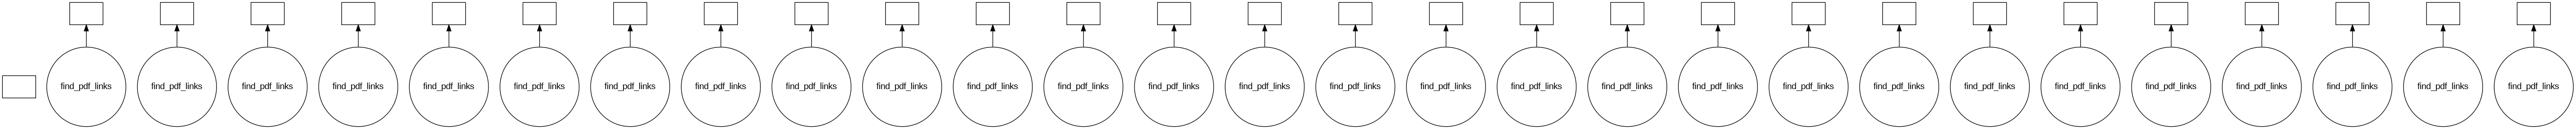

In [6]:
actual_pdf_links = dask.visualize(delayed_pdf_links)
display(actual_pdf_links)

In [7]:
actual_pdf_links = delayed_pdf_links.compute()

https://www.congress.gov/109/crec/2005/05/26/CREC-2005-05-26.pdf
https://www.congress.gov/112/crec/2012/05/17/CREC-2012-05-17.pdf
https://www.congress.gov/112/crec/2012/05/17/CREC-2012-05-17.pdf
https://www.congress.gov/109/crec/2005/05/19/CREC-2005-05-19.pdf
https://www.congress.gov/109/crec/2005/05/18/CREC-2005-05-18.pdf
https://www.congress.gov/109/crec/2005/05/16/CREC-2005-05-16.pdf
https://www.congress.gov/109/crec/2005/03/10/CREC-2005-03-10.pdf
https://www.congress.gov/112/crec/2012/02/09/CREC-2012-02-09.pdf
https://www.congress.gov/112/crec/2012/02/06/CREC-2012-02-06.pdf
https://www.congress.gov/112/crec/2012/02/03/CREC-2012-02-03.pdf
https://www.congress.gov/109/crec/2005/02/10/CREC-2005-02-10.pdf
https://www.congress.gov/109/crec/2005/02/10/CREC-2005-02-10.pdf
https://www.congress.gov/109/crec/2005/02/09/CREC-2005-02-09.pdf
https://www.congress.gov/112/crec/2011/12/13/CREC-2011-12-13.pdf
https://www.congress.gov/112/crec/2011/12/08/CREC-2011-12-08.pdf
Expecting value: line 1 c

https://www.congress.gov/112/crec/2011/06/03/CREC-2011-06-03.pdf


https://www.congress.gov/114/crec/2015/05/15/CREC-2015-05-15.pdf
https://www.congress.gov/114/crec/2015/05/14/CREC-2015-05-14.pdf


https://www.congress.gov/106/crec/2000/09/20/CREC-2000-09-20.pdf
https://www.congress.gov/106/crec/2000/09/14/CREC-2000-09-14.pdf
https://www.congress.gov/106/crec/2000/09/14/CREC-2000-09-14.pdf
https://www.congress.gov/106/crec/2000/09/08/CREC-2000-09-08.pdf
https://www.congress.gov/114/crec/2015/01/22/CREC-2015-01-22.pdf
https://www.congress.gov/114/crec/2015/01/22/CREC-2015-01-22.pdf


https://www.congress.gov/106/crec/2000/06/19/CREC-2000-06-19.pdf


https://www.congress.gov/106/crec/2000/06/15/146/75/CREC-2000-06-15.pdf
https://www.congress.gov/113/crec/2014/11/14/CREC-2014-11-14.pdf


https://www.congress.gov/106/crec/2000/06/08/146/70/CREC-2000-06-08.pdf
https://www.congress.gov/106/crec/2000/06/08/146/70/CREC-2000-06-08.pdf
https://www.congress.gov/113/crec/2014/09/19/CREC-2014-09-19.pdf
https://www.congress.gov/107/crec/2002/05/23/CREC-2002-05-23.pdf
https://www.congress.gov/107/crec/2002/04/18/CREC-2002-04-18.pdf
https://www.congress.gov/113/crec/2014/07/18/160/113/CREC-2014-07-18.pdf
https://www.congress.gov/107/crec/2002/04/11/CREC-2002-04-11.pdf
https://www.congress.gov/107/crec/2002/04/09/CREC-2002-04-09.pdf
https://www.congress.gov/113/crec/2014/06/26/CREC-2014-06-26.pdf
https://www.congress.gov/107/crec/2002/03/20/CREC-2002-03-20.pdf
https://www.congress.gov/107/crec/2002/02/28/CREC-2002-02-28.pdf
https://www.congress.gov/107/crec/2002/01/24/CREC-2002-01-24.pdf
https://www.congress.gov/107/crec/2001/12/20/CREC-2001-12-20.pdf
https://www.congress.gov/108/crec/2003/04/11/CREC-2003-04-11.pdf
https://www.congress.gov/108/crec/2003/04/11/CREC-2003-04-11.pdf
htt

https://www.congress.gov/106/crec/2000/04/11/146/45/CREC-2000-04-11.pdf
https://www.congress.gov/110/crec/2008/02/29/CREC-2008-02-29.pdf
https://www.congress.gov/110/crec/2008/02/29/CREC-2008-02-29.pdf
https://www.congress.gov/106/crec/2000/03/21/146/32/CREC-2000-03-21.pdf
https://www.congress.gov/110/crec/2008/02/14/CREC-2008-02-14.pdf
https://www.congress.gov/106/crec/2000/03/14/146/28/CREC-2000-03-14.pdf
https://www.congress.gov/106/crec/2000/03/14/146/28/CREC-2000-03-14.pdf
https://www.congress.gov/106/crec/2000/02/10/146/12/CREC-2000-02-10.pdf


https://www.congress.gov/110/crec/2007/12/13/CREC-2007-12-13.pdf
https://www.congress.gov/106/crec/1999/11/17/145/163/CREC-1999-11-17.pdf
https://www.congress.gov/106/crec/1999/11/09/145/157/CREC-1999-11-09.pdf
https://www.congress.gov/106/crec/1999/11/09/145/157/CREC-1999-11-09.pdf
https://www.congress.gov/110/crec/2007/11/15/CREC-2007-11-15.pdf
https://www.congress.gov/110/crec/2007/11/13/CREC-2007-11-13.pdf
https://www.congress.gov/110/crec/2007/11/13/CREC-2007-11-13.pdf
https://www.congress.gov/110/crec/2007/11/13/CREC-2007-11-13.pdf
https://www.congress.gov/106/crec/1999/11/02/145/152/CREC-1999-11-02.pdf
https://www.congress.gov/106/crec/1999/11/01/145/151/CREC-1999-11-01.pdf
https://www.congress.gov/106/crec/1999/10/28/145/149/CREC-1999-10-28.pdf
https://www.congress.gov/106/crec/1999/10/27/145/148/CREC-1999-10-27.pdf
https://www.congress.gov/110/crec/2007/10/18/CREC-2007-10-18.pdf
https://www.congress.gov/110/crec/2007/10/17/CREC-2007-10-17.pdf
https://www.congress.gov/106/crec/